In [1]:
# read data
dataset = []
files = open('dim32.txt')
for one_instance in files.readlines():
    temp = one_instance.split()
    dataset.append(temp)
files.close()

In [2]:
print(len(dataset)) # N = 1024
print(len(dataset[0])) # d = 32

1024
32


In [3]:
from sklearn.cluster import KMeans
import numpy as np

In [4]:
# choose the last 1000 element to be testset, others to be trainset.
X = np.array(dataset)
trainset = X[:1000]
testset = X[-1000:]

In [5]:
# try k = 2, k-mean function from sklearn
kmeans = KMeans(n_clusters=2, random_state=0).fit(trainset)

In [6]:
# single test
kmeans.score(testset)

-79837916.3924366

In [7]:
# inertia_ is the function return distance of point to its centroid
kmeans.inertia_

80221823.77287138

In [8]:
# try different K, and obtain the SSE with each K in a list
sse = []
for i in range(1,30):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(trainset)
  sse.append(kmeans.inertia_)

In [9]:
import matplotlib.pyplot as plt

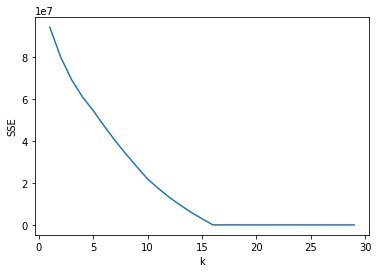

In [10]:
# Plot SSE changes with respect to k
k = [x for x in range(1,30)]
plt.plot(k, sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()
# Therefore, the optimal K should be 16 in this K-means

In [23]:
# use the best K to predict dataset
kmeans = KMeans(n_clusters=16, random_state=0).fit(X)
clusters = kmeans.predict(testset)

In [25]:
optimal_clusters = kmeans.fit_transform(X)

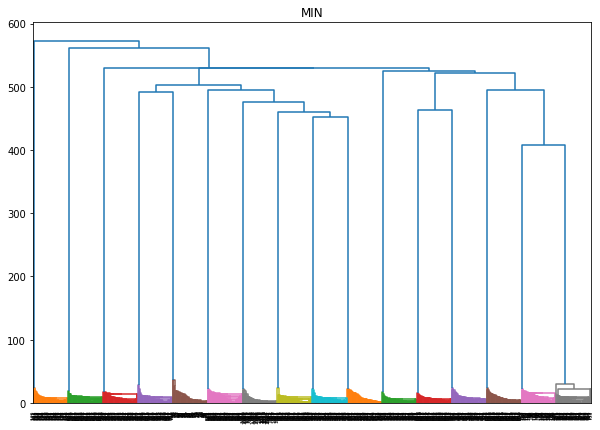

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("MIN")  
dend = shc.dendrogram(shc.linkage(optimal_clusters, method='single'))

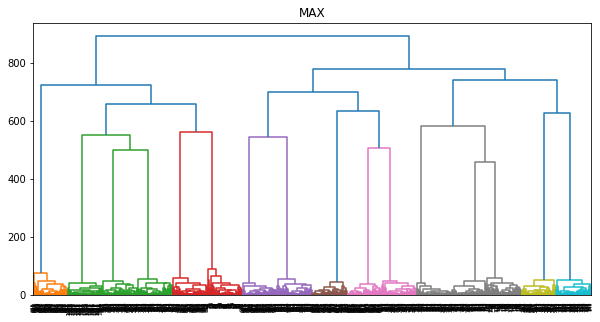

In [30]:
plt.figure(figsize=(10, 5))  
plt.title("MAX")  
dend = shc.dendrogram(shc.linkage(optimal_clusters, method='complete'))

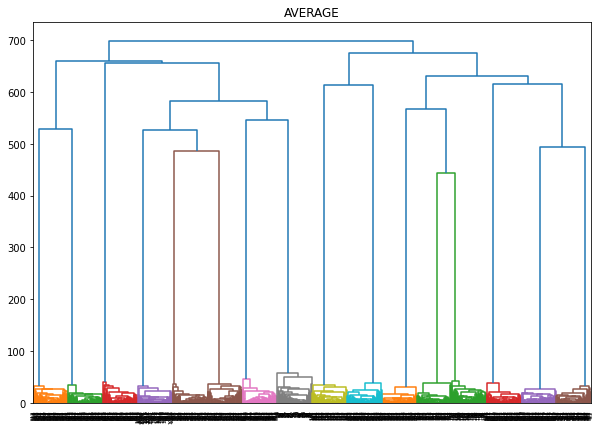

In [28]:
plt.figure(figsize=(10, 7))  
plt.title("AVERAGE")  
dend = shc.dendrogram(shc.linkage(optimal_clusters, method='average'))